In [1]:
# imports
import numpy as np
import sys
sys.path.append('../')
from landscape_models import make_NK, make_RMF
import matplotlib.pyplot as plt
import utils
import pandas as pd
from ruggedness import NMaximaEstimator
from tqdm.notebook import tqdm
import seaborn as sns
from sklearn.preprocessing import minmax_scale

In [296]:
def run_NK_replicates(Kminus, n_values=[4,5,6,7,8] ,alphabet='AGC', reps=10, dist=np.random.uniform): 
    ALPHABET = alphabet
    SEQ_LENS = n_values 
    REPL     = reps
    DIST     = np.random.uniform
    
    results = []
    ruggs = []
    for N in tqdm(SEQ_LENS): 
        repls = []
        for replicate in range(REPL):
            #print(N, N-K)
            landscape = make_NK(N, N-Kminus, ALPHABET, np.random.uniform)
            estimator = NMaximaEstimator(landscape, ALPHABET).fit()
            n_maxima  = estimator.n_maxima
            repls.append(n_maxima)
        results.append(repls)
        ruggs.append((N-Kminus)/N)
        
    results = np.array(results)
    
    return results, ruggs

In [297]:
data = []
Ks   = [1,2,3]

for K in Ks: 
    data.append(run_NK_replicates(K))



  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [300]:
x = np.array([i[0] for i in data])

In [326]:
xmeans = np.mean(x, axis=2)
std    = np.std(x, axis=2)

In [331]:
std

array([[ 1.18321596,  2.58650343,  3.49284984,  7.24499827, 20.12560558],
       [ 0.89442719,  2.28035085,  3.15594677,  6.49923072, 14.03602508],
       [ 0.74833148,  1.37477271,  4.1521079 ,  3.87814389,  8.41189634]])

In [330]:
xmeans

array([[  9. ,  22.9,  56. , 146.1, 391.4],
       [  5. ,  15. ,  36.2, 100.6, 267.7],
       [  3.2,   7.1,  22.6,  63.4, 179.8]])

In [332]:
percent_error = np.divide(std, xmeans)

In [333]:
percent_error

array([[0.13146844, 0.11294775, 0.06237232, 0.04958931, 0.05141953],
       [0.17888544, 0.15202339, 0.08718085, 0.06460468, 0.05243192],
       [0.23385359, 0.19362996, 0.18372159, 0.06116946, 0.04678474]])

In [307]:
normalisation = lambda A, N: (A**N)/N+1

In [313]:
norms = np.array([normalisation(3, i) for i in [4,5,6,7,8]])/2

In [314]:
norms

array([ 10.625     ,  24.8       ,  61.25      , 156.71428571,
       410.5625    ])

In [318]:
ruggeds = np.array([[K/N for N in [4,5,6,7,8]] for K in Ks])

In [319]:
ruggeds

array([[0.25      , 0.2       , 0.16666667, 0.14285714, 0.125     ],
       [0.5       , 0.4       , 0.33333333, 0.28571429, 0.25      ],
       [0.75      , 0.6       , 0.5       , 0.42857143, 0.375     ]])

In [334]:
normed = xmeans/norms

In [335]:
error = np.multiply(normed, percent_error)

In [337]:
 n_values=[4,5,6,7,8]

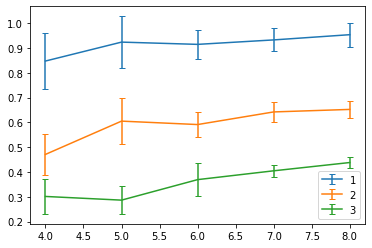

In [341]:
for i in range(len(normed)): 
    #plt.plot(n_values,normed[i], marker='.')
    plt.errorbar(n_values, normed[i], yerr=error[i], capsize=3, label=Ks[i])
plt.legend()
